# U.S. Medical Insurance Costs

### For this project, I will implement a Linear Regression Model to determine if a correlation exists between a male who doesn't smoke or have children and Insurane Cost. This project consists of Data Aquisition, Data Extraction, and Data Visualization.

In [1]:
import csv
import numpy as np
from scipy import stats
import sys
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Create lists to hold datasets
ages = []
gender = []
bmis = []
num_children = []
is_smoker = []
regions = []
insurance_costs = []

In [3]:
# Create a function that will pass the fileName, and lst
# Open fileName and save each row's value to the respective list

def save_data(csvfile,lst,attribute):
    with open(csvfile, mode='r', newline='') as csvinfo:
        csv_info = csv.DictReader(csvinfo)
        for row in csv_info:
            lst.append(row[attribute])
    return lst

In [4]:
# Get data set for each attribute
save_data("C:/Users/tayoi/insurance.csv",ages,'age')
save_data("C:/Users/tayoi/insurance.csv",gender,'sex')
save_data("C:/Users/tayoi/insurance.csv",bmis,'bmi')
save_data("C:/Users/tayoi/insurance.csv",num_children,'children')
save_data("C:/Users/tayoi/insurance.csv",is_smoker,'smoker')
save_data("C:/Users/tayoi/insurance.csv",insurance_costs,'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

In [5]:
# Convert Numerical Strings to integers/float
ages = [int(x) for x in ages]
bmis = [float(x) for x in bmis]
num_children = [int(x) for x in num_children]
insurance_costs = [float(x) for x in insurance_costs]

In [6]:
# Add insurance costs to cost list for men who don't smoke or have children
# Add age
cost = []
male_age = []

for i in range(len(ages)):
    if gender[i] == 'male' and is_smoker[i] == 'no' and num_children[i] == 0:
        cost.append(insurance_costs[i])
        male_age.append(ages[i])

In [7]:
# Test if lst size are equal
print(len(male_age))
print(len(cost))

223
223


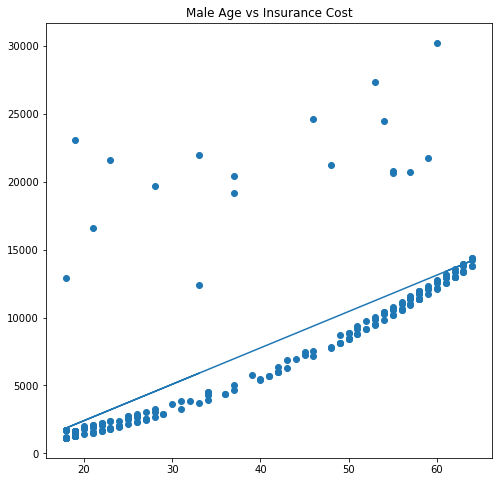

Correlation: 0.7394574896276617
Positive Correlation


In [8]:
# Create a Scatter Plot and Implement Linear Regression

x = male_age
y = cost

slope, intercept, r, p, std_err = stats.linregress(x, y)

def calc_line(x):
  return slope * x + intercept

mymodel = list(map(calc_line, x))

plt.scatter(x, y)
plt.title("Male Age vs Insurance Cost")
plt.gcf().set_size_inches((8, 8))
plt.plot(x, mymodel)
plt.show()
print("Correlation: {}".format(r))
print("Positive Correlation")

In [9]:
# Predict Insurance Cost based on age
print("Prediction Insurance Cost for a male at age 30: {}".format(calc_line(30)))
print("Prediction Insurance Cost for a male at age 40: {}".format(calc_line(40)))

print("Given the Prediction, a male at age 30 is expected to pay less than a male at age 40")

Prediction Insurance Cost for a male at age 30: 5085.739482659658
Prediction Insurance Cost for a male at age 40: 7767.736454410254
Given the Prediction, a male at age 30 is expected to pay less than a male at age 40


In [10]:
# Calculate mean, median, and mode of insurance costs
mean_cost = np.mean(cost)
median_cost = np.median(cost)
mode_cost = stats.mode(cost)

print("Average Insurance Cost: {}".format(mean_cost))
print("Median Insurance Cost: {}".format(median_cost))
print(mode_cost)

Average Insurance Cost: 7530.806677085201
Median Insurance Cost: 6358.77645
ModeResult(mode=array([1639.5631]), count=array([2]))


In [11]:
# Calculate mean, median, and mode of male age
mean_age = np.mean(male_age)
median_age = np.median(male_age)
mode_age = stats.mode(male_age)

print("Average Age: {}".format(mean_age))
print("Median Age: {}".format(median_age))
print(mode_age)

Average Age: 39.11659192825112
Median Age: 39.0
ModeResult(mode=array([19]), count=array([20]))


### From the result I am able to conclude that with a relationship of 0.74, there's a positive correlation between the age of a male who is not a smoker and doesn't have children and insurance costs.

### From this model, I am able to predict the insurance cost of a male given the age